# Data processing - SisFall dataset

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML
import os
import glob
import io
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

In [31]:
# subject_folders = os.listdir("Sisfall_dataset")
# column_names = ["accel_x", "accel_y", "accel_z", "gyro_x", "gyro_y",\
#                                      "gyro_z", "mag_x", "mag_y", "mag_z"]
# combined_data = pd.DataFrame(columns=column_names)

# for i in subject_folders:
#     temp_folder = []
#     if(i != 'combined_data.csv'):
#         temp_folder = os.listdir("Sisfall_dataset/" + i)
#         number_files = len(temp_folder)
#         print("Reading folder: " + i)
#         for j in temp_folder:
#             file = io.BytesIO(open("Sisfall_dataset/" + i + "/" + j, 'rb').read().replace(b';',b''))
#             data = np.genfromtxt(file,dtype=int,delimiter=',')
#             df = pd.DataFrame(data, columns = column_names)
#             pointers = j.split('_')
#             df["user"] = pointers[1]
#             df["activity"] = pointers[0]
#             df = df.iloc[::10, :]
#             combined_data = combined_data.append(df)
# combined_data

Reading folder: SA01
Reading folder: SA02
Reading folder: SA04
Reading folder: SA05
Reading folder: SA06
Reading folder: SA09
Reading folder: SA10
Reading folder: SA11
Reading folder: SA17
Reading folder: SA18
Reading folder: SA19
Reading folder: SA21


,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,user,activity
0,17,-179,-99,-18,-504,-352,76,-697,-279,SA01,D01
10,-50,-357,-7,-178,-766,-52,-210,-1363,82,SA01,D01
20,86,-228,-63,522,-364,132,326,-899,-129,SA01,D01
30,70,-256,-16,43,-186,476,267,-985,61,SA01,D01
40,12,-212,-19,119,260,429,39,-821,52,SA01,D01
...,...,...,...,...,...,...,...,...,...,...,...
2950,-256,23,20,-69,50,-10,-1021,91,60,SA21,F15
2960,-259,26,25,-61,58,-11,-1018,82,57,SA21,F15
2970,-257,25,24,-56,72,-10,-1024,86,53,SA21,F15
2980,-259,22,20,-34,71,-16,-1014,82,57,SA21,F15


In [32]:
# combined_data.to_csv("Sisfall_dataset/combined_data_20Hz", index=False)

## Data Visualisation

In [3]:
all_data = pd.read_csv("Sisfall_dataset/combined_data_20Hz.csv")
all_data

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,user,activity
0,17,-179,-99,-18,-504,-352,76,-697,-279,SA01,D01
1,-50,-357,-7,-178,-766,-52,-210,-1363,82,SA01,D01
2,86,-228,-63,522,-364,132,326,-899,-129,SA01,D01
3,70,-256,-16,43,-186,476,267,-985,61,SA01,D01
4,12,-212,-19,119,260,429,39,-821,52,SA01,D01
...,...,...,...,...,...,...,...,...,...,...,...
628297,-256,23,20,-69,50,-10,-1021,91,60,SA21,F15
628298,-259,26,25,-61,58,-11,-1018,82,57,SA21,F15
628299,-257,25,24,-56,72,-10,-1024,86,53,SA21,F15
628300,-259,22,20,-34,71,-16,-1014,82,57,SA21,F15


In [4]:
actions = all_data.groupby(["activity"]).groups.keys()
actions

dict_keys(['D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15'])

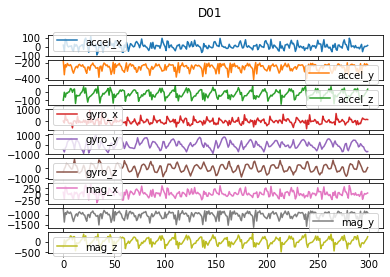

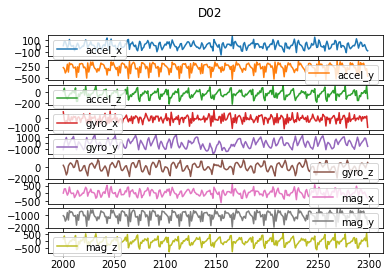

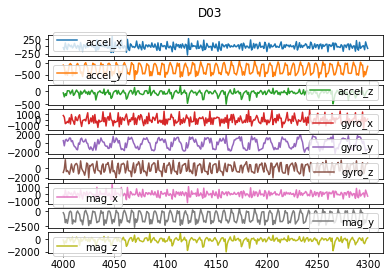

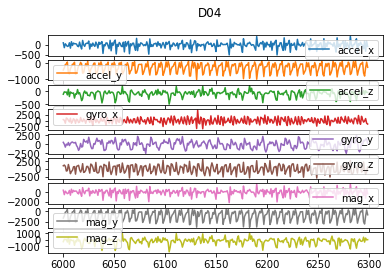

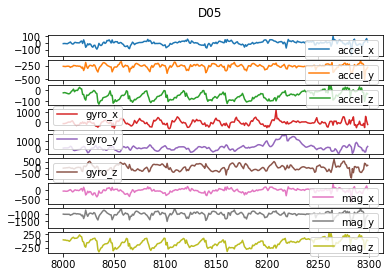

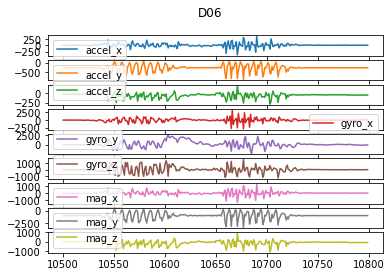

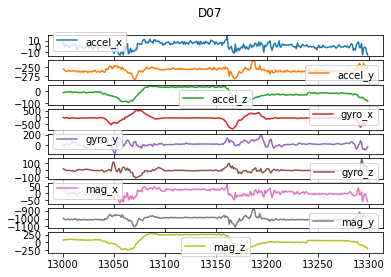

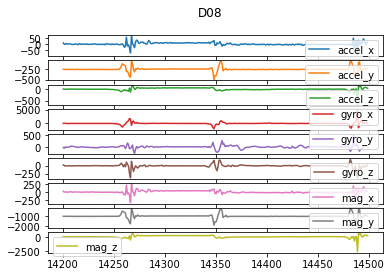

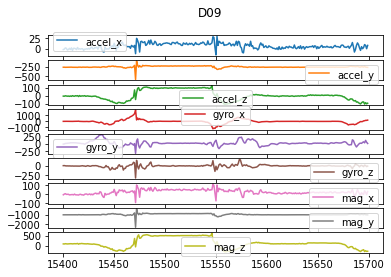

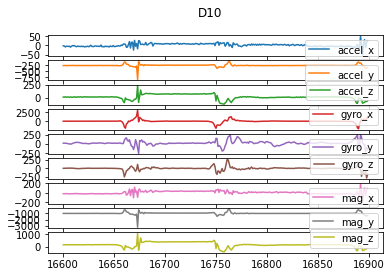

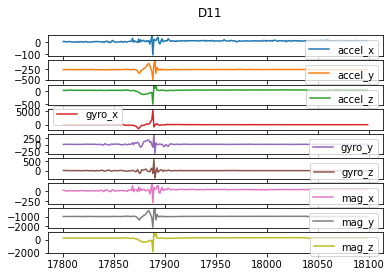

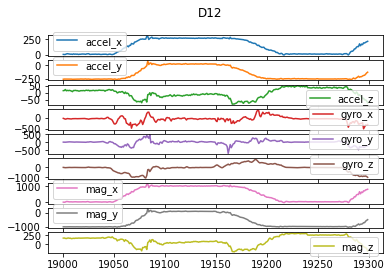

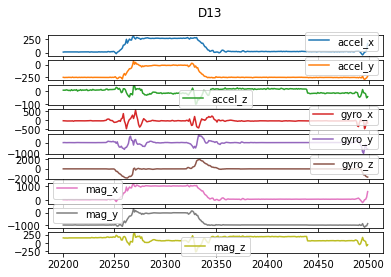

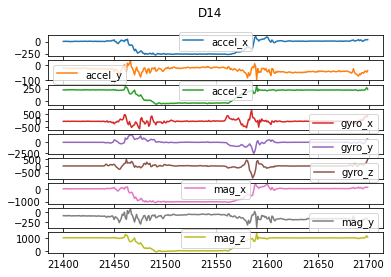

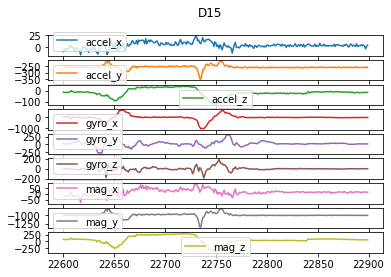

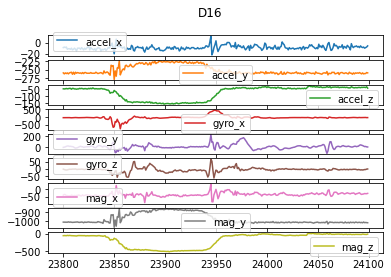

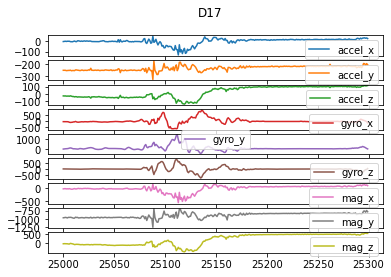

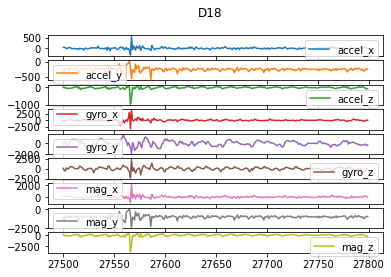

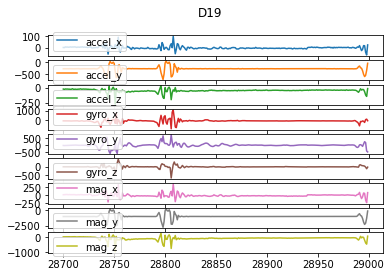

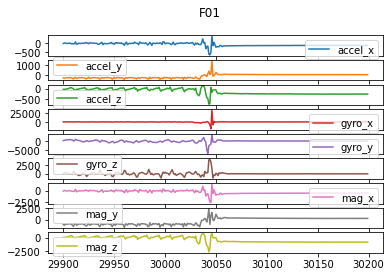

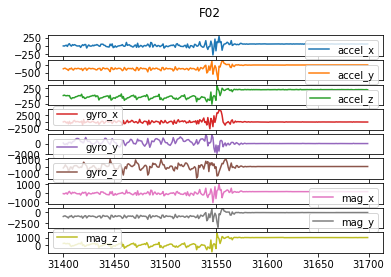

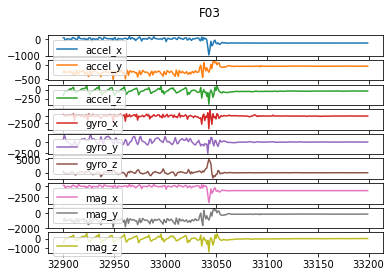

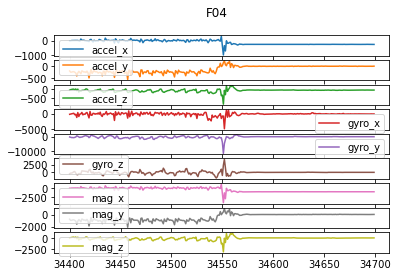

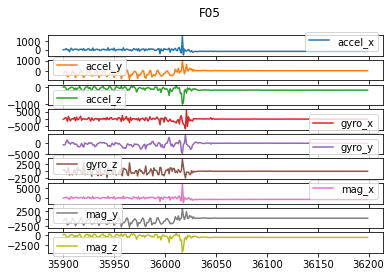

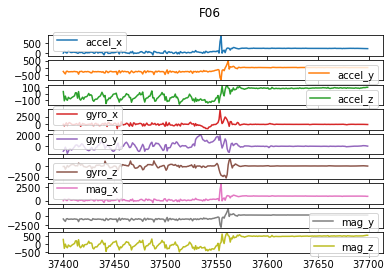

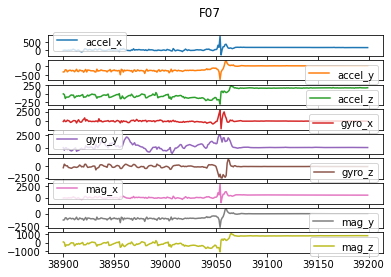

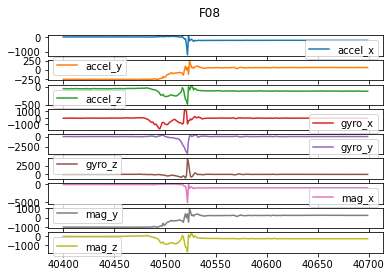

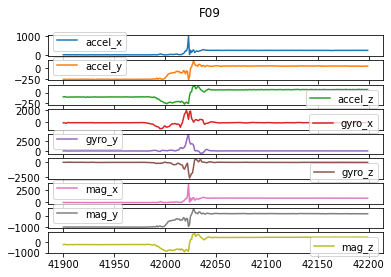

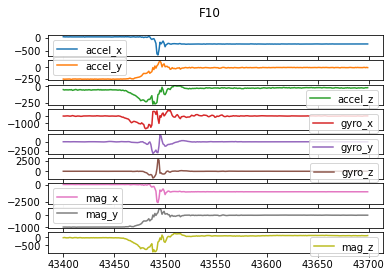

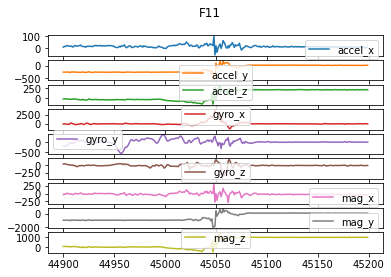

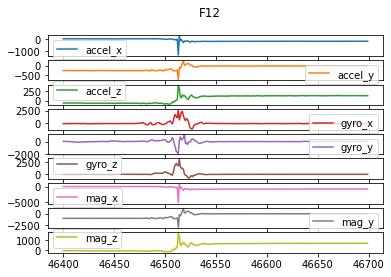

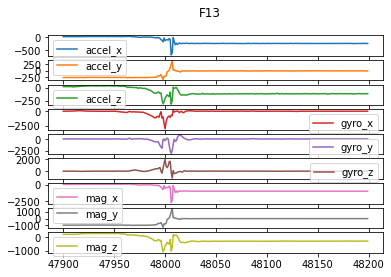

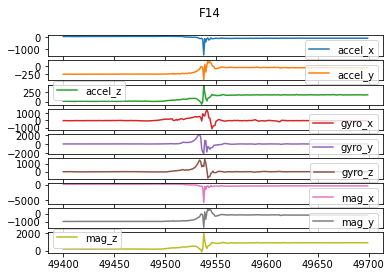

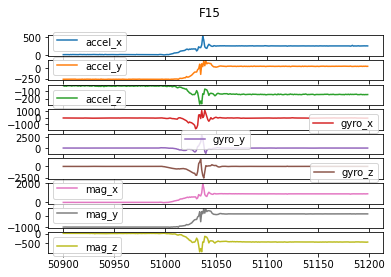

In [5]:
for action in actions:
    data = all_data[all_data["activity"]==action][0:300]
    data = data.drop(["user", "activity"], axis = 1)
    data.plot.line(subplots=True, title=action)

## Data Processing

In [6]:
final_data = all_data.drop(["mag_x", "mag_y", "mag_z"], axis = 1)
final_data

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,user,activity
0,17,-179,-99,-18,-504,-352,SA01,D01
1,-50,-357,-7,-178,-766,-52,SA01,D01
2,86,-228,-63,522,-364,132,SA01,D01
3,70,-256,-16,43,-186,476,SA01,D01
4,12,-212,-19,119,260,429,SA01,D01
...,...,...,...,...,...,...,...,...
628297,-256,23,20,-69,50,-10,SA21,F15
628298,-259,26,25,-61,58,-11,SA21,F15
628299,-257,25,24,-56,72,-10,SA21,F15
628300,-259,22,20,-34,71,-16,SA21,F15


In [7]:
final_data = final_data[final_data['activity']!="D11"]
final_data = final_data[final_data['activity']!="D14"]
final_data = final_data[final_data['activity']!="D17"]
final_data = final_data[final_data['activity']!="F13"]
final_data = final_data[final_data['activity']!="F14"]
final_data = final_data[final_data['activity']!="F15"]

In [36]:
actions = final_data.groupby(["activity"]).groups.keys()
actions

dict_keys(['D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D12', 'D13', 'D15', 'D16', 'D18', 'D19', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12'])

In [51]:
activity_mappings = {"D01" : "Walking",
                    "D02" : "Walking",
                    "D03" : "Jogging",
                    "D04" : "Jogging"  ,
                    "D05" : "upstairs and downstairs",
                    "D06" : "upstairs and downstairs" ,
                    "D07" : "sit and up"  ,
                    "D08" : "sit and up"  ,
                    "D09" : "sit and up"  ,
                    "D10" : "sit and up"  ,
                    "D12" : "Sitting, lying and sitting"  ,
                    "D13" : "Sitting, lying and sitting"  ,
                    "D15" : "Standing, knee bend and up"  ,
                    "D16" : "Standing, bending and up"  ,
                    "D18" : "Stumble"  , #every 40 - 100 in 300, rest is D01
                    "D19" : "Gentle jump" ,
                    "F01" :"Fall forward slip", #120 - 200 in every 300, rest is D01 except 200-300
                    "F02" :"Fall backward slip", #120 - 200 in every 300, rest is D01 except 200-300
                    "F03" :"Lateral fall slip", #120 - 200 in every 300, rest is D01 except 200-300
                    "F04" :"Fall forward trip", #120 - 200 in every 300, rest is D01 except 200-300
                    "F05" :"Fall forward trip", #70 - 150 in every 300, rest is D03 except 150-300
                    "F06" :"Vertical fall fainting", #120 - 200 in every 300, rest is D01 except 200-300
                    "F07" :"Fall fainting", #120 - 200 in every 300, rest is D01 except 200-300
                    "F08" :"Fall forward", #80 - 110 in every 300, rest is F08A except 110-300
                    "F08A":"getting up",
                    "F09" :"Lateral fall", #80 - 110 in every 300, rest is F08A except 110-300
                    "F10" :"Fall forward", #50 - 130 in every 300, rest is F10A except 130-300
                    "F10A":"Sitting down", 
                    "F11" :"Fall backward", #120 - 200 in every 300, rest is F10A except 200-300
                    "F12" :"Lateral fall", #70 - 150 in every 300, rest is F10A except 150-300
                    }
broader_activity_mappings = {"D01" : "Walking",
                    "D02" : "Walking",
                    "D03" : "Jogging",
                    "D04" : "Jogging"  ,
                    "D05" : "climbing stairs",
                    "D06" : "climbing stairs" ,
                    "D07" : "getting up"  ,
                    "D08" : "getting up"  ,
                    "D09" : "getting up"  ,
                    "D10" : "getting up"  ,
                    "D12" : "Sitting action"  ,
                    "D13" : "Sitting action"  ,
                    "D15" : "getting up"  ,
                    "D16" : "getting up"  ,
                    "D18" : "Stumble"  , #every 40 - 100 in 300, rest is D01
                    "D19" : "Gentle jump" ,
                    "F01" :"Fall", #120 - 200 in every 300, rest is D01 except 200-300
                    "F02" :"Fall", #120 - 200 in every 300, rest is D01 except 200-300
                    "F03" :"Fall", #120 - 200 in every 300, rest is D01 except 200-300
                    "F04" :"Fall", #120 - 200 in every 300, rest is D01 except 200-300
                    "F05" :"Fall", #70 - 150 in every 300, rest is D03 except 150-300
                    "F06" :"Fall", #120 - 200 in every 300, rest is D01 except 200-300
                    "F07" :"Fall", #120 - 200 in every 300, rest is D01 except 200-300
                    "F08" :"Fall", #80 - 110 in every 300, rest is F08A except 110-300
                    "F08A":"getting up",
                    "F09" :"Fall", #80 - 110 in every 300, rest is F08A except 110-300
                    "F10" :"Fall", #50 - 130 in every 300, rest is F10A except 130-300
                    "F10A":"Sitting action", 
                    "F11" :"Fall", #120 - 200 in every 300, rest is F10A except 200-300
                    "F12" :"Fall", #70 - 150 in every 300, rest is F10A except 150-300
                    }

In [52]:
def change_action(data, start, end, action):
    for i in range(0, len(data["activity"]), 300):
        data[i:i+start]["mapped_activity"] = activity_mappings[action]
        data[i:i+start]["broad_mapped_activity"] = broader_activity_mappings[action]
#         data[i+start:i+end]["mapped_activity"] = activity_mappings[default_action]
        data[i+end:i+300]["mapped_activity"] = "none"
        data[i+end:i+300]["broad_mapped_activity"] = "none"
    return data

In [53]:
temp_data = final_data.groupby(["activity"])
columns = list(final_data.columns)
columns.append("mapped_activity")
sisfall_data = pd.DataFrame(columns = columns)

for action in actions:
    data = temp_data.get_group(action)
    data["mapped_activity"] = activity_mappings[action]
    data["broad_mapped_activity"] = broader_activity_mappings[action]
    if action == "D18":
        data = change_action(data, 40, 100, "D01")
    elif action in ["F01", "F02", "F03", "F04", "F06", "F07"]:
        data = change_action(data, 120, 200, "D01")
    elif action == "F05":
        data = change_action(data, 70, 150, "D03")
    elif action in ["F08", "F09"]:
        data = change_action(data, 80, 110, "F08A")
    elif action == "F10":
        data = change_action(data, 50, 130, "F10A")
    elif action == "F11":
        data = change_action(data, 120, 200, "F10A")
    elif action == "F12":
        data = change_action(data, 70, 150, "F10A")
        
    sisfall_data = sisfall_data.append(data)
sisfall_data[sisfall_data["activity"] == "F05"][68:153]

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,user,activity,mapped_activity,broad_mapped_activity
35968,-68,-231,-27,66,-1658,-523,SA01,F05,Jogging,Jogging
35969,121,-156,39,270,-1363,-761,SA01,F05,Jogging,Jogging
35970,93,5,-34,224,-262,-647,SA01,F05,Fall forward trip,Fall
35971,0,-66,-78,-269,-591,264,SA01,F05,Fall forward trip,Fall
35972,94,-196,-297,228,-435,205,SA01,F05,Fall forward trip,Fall
...,...,...,...,...,...,...,...,...,...,...
36048,-187,71,-177,2,-21,3,SA01,F05,Fall forward trip,Fall
36049,-185,55,-179,-87,-28,-4,SA01,F05,Fall forward trip,Fall
36050,-195,40,-180,-135,17,-37,SA01,F05,none,none
36051,-202,37,-185,-73,-20,-35,SA01,F05,none,none


In [54]:
sisfall_data = sisfall_data.loc[sisfall_data["broad_mapped_activity"]!="none"]
sisfall_data

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,user,activity,mapped_activity,broad_mapped_activity
0,17,-179,-99,-18,-504,-352,SA01,D01,Walking,Walking
1,-50,-357,-7,-178,-766,-52,SA01,D01,Walking,Walking
2,86,-228,-63,522,-364,132,SA01,D01,Walking,Walking
3,70,-256,-16,43,-186,476,SA01,D01,Walking,Walking
4,12,-212,-19,119,260,429,SA01,D01,Walking,Walking
...,...,...,...,...,...,...,...,...,...,...
623647,253,-17,-6,441,-172,-256,SA21,F12,Lateral fall,Fall
623648,264,17,52,-245,266,429,SA21,F12,Lateral fall,Fall
623649,241,-48,92,-424,531,194,SA21,F12,Lateral fall,Fall
623650,220,-26,96,204,620,-35,SA21,F12,Lateral fall,Fall


In [55]:
new_actions = sisfall_data.groupby(["mapped_activity"]).groups.keys()
print(new_actions)
new_broad_actions = sisfall_data.groupby(["broad_mapped_activity"]).groups.keys()
print(new_broad_actions)

dict_keys(['Fall backward', 'Fall backward slip', 'Fall fainting', 'Fall forward', 'Fall forward slip', 'Fall forward trip', 'Gentle jump', 'Jogging', 'Lateral fall', 'Lateral fall slip', 'Sitting down', 'Sitting, lying and sitting', 'Standing, bending and up', 'Standing, knee bend and up', 'Stumble', 'Vertical fall fainting', 'Walking', 'getting up', 'sit and up', 'upstairs and downstairs'])
dict_keys(['Fall', 'Gentle jump', 'Jogging', 'Sitting action', 'Stumble', 'Walking', 'climbing stairs', 'getting up'])


In [58]:
def convert(data, rnge, res):
    return data * ((2*rnge)/2**res)

In [59]:
for i in range (0, 3):
    sisfall_data.iloc[:, i] = convert(sisfall_data.iloc[:, i], 16, 13)
for i in range (3, 6):
    sisfall_data.iloc[:, i] = convert(sisfall_data.iloc[:, i], 2000, 16)
sisfall_data

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,user,activity,mapped_activity,broad_mapped_activity
0,0.066406,-0.699219,-0.386719,-1.098633,-30.761719,-21.484375,SA01,D01,Walking,Walking
1,-0.195312,-1.394531,-0.027344,-10.864258,-46.75293,-3.173828,SA01,D01,Walking,Walking
2,0.335938,-0.890625,-0.246094,31.860352,-22.216797,8.056641,SA01,D01,Walking,Walking
3,0.273438,-1.0,-0.0625,2.624512,-11.352539,29.052734,SA01,D01,Walking,Walking
4,0.046875,-0.828125,-0.074219,7.263184,15.869141,26.184082,SA01,D01,Walking,Walking
...,...,...,...,...,...,...,...,...,...,...
623647,0.988281,-0.066406,-0.023438,26.916504,-10.498047,-15.625,SA21,F12,Lateral fall,Fall
623648,1.03125,0.066406,0.203125,-14.953613,16.235352,26.184082,SA21,F12,Lateral fall,Fall
623649,0.941406,-0.1875,0.359375,-25.878906,32.409668,11.84082,SA21,F12,Lateral fall,Fall
623650,0.859375,-0.101562,0.375,12.451172,37.841797,-2.13623,SA21,F12,Lateral fall,Fall


In [60]:
sisfall_data.to_csv("Sisfall_dataset/processed_data.csv", index=False)

## Data Visualisation

In [8]:
all_data = pd.read_csv("Sisfall_dataset/processed_data.csv")
all_data

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,user,activity,mapped_activity,broad_mapped_activity
0,0.066406,-0.699219,-0.386719,-1.098633,-30.761719,-21.484375,SA01,D01,Walking,Walking
1,-0.195312,-1.394531,-0.027344,-10.864258,-46.752930,-3.173828,SA01,D01,Walking,Walking
2,0.335938,-0.890625,-0.246094,31.860352,-22.216797,8.056641,SA01,D01,Walking,Walking
3,0.273438,-1.000000,-0.062500,2.624512,-11.352539,29.052734,SA01,D01,Walking,Walking
4,0.046875,-0.828125,-0.074219,7.263184,15.869141,26.184082,SA01,D01,Walking,Walking
...,...,...,...,...,...,...,...,...,...,...
412897,0.988281,-0.066406,-0.023438,26.916504,-10.498047,-15.625000,SA21,F12,Lateral fall,Fall
412898,1.031250,0.066406,0.203125,-14.953613,16.235352,26.184082,SA21,F12,Lateral fall,Fall
412899,0.941406,-0.187500,0.359375,-25.878906,32.409668,11.840820,SA21,F12,Lateral fall,Fall
412900,0.859375,-0.101562,0.375000,12.451172,37.841797,-2.136230,SA21,F12,Lateral fall,Fall


In [9]:
actions = all_data.groupby(["broad_mapped_activity"]).groups.keys()
actions

dict_keys(['Fall', 'Gentle jump', 'Jogging', 'Sitting action', 'Stumble', 'Walking', 'climbing stairs', 'getting up'])

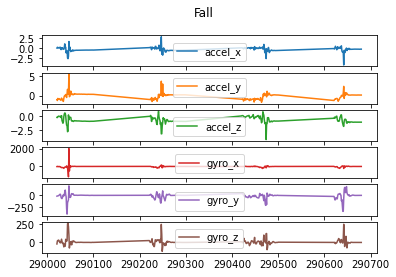

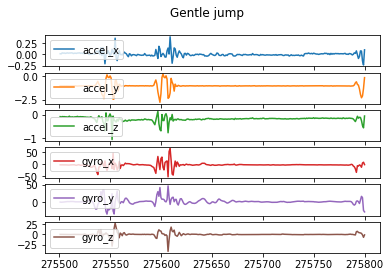

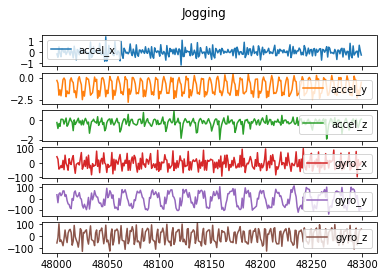

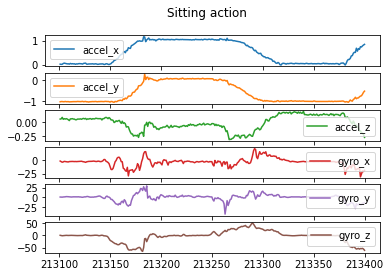

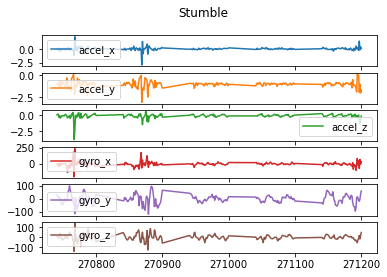

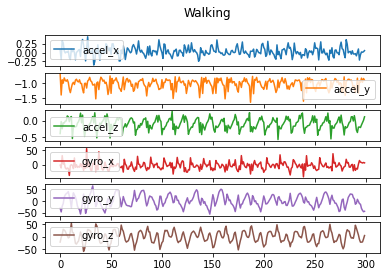

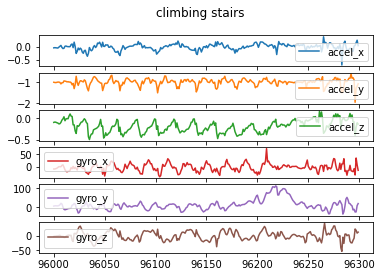

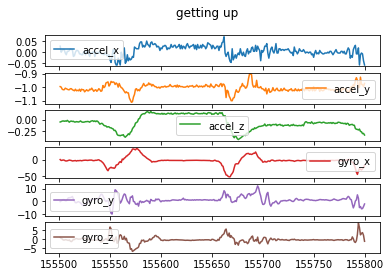

In [12]:
for action in actions:
    data = all_data[all_data["broad_mapped_activity"]==action][0:300]
    data = data.drop(["user", "activity", "broad_mapped_activity", "mapped_activity"], axis = 1)
    data.plot.line(subplots=True, title=action)

# Data processing - Actual Collected Data

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML
import os
import glob
import io
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

In [3]:
subject_folders = os.listdir("new data")
column_names = ["accel_x", "accel_y", "accel_z", "gyro_x", "gyro_y", "gyro_z"]
combined_data = pd.DataFrame(columns=column_names)

activity = {'fall': 'Fall', 'jogging': 'Jogging', 'sitting': 'Sitting action', 'walking': 'Walking', 'stairsdown': \
            'climbing stairs', 'stairsup': 'climbing stairs', 'gettingup': 'Sitting action', 'idle': 'Idle'}

for i in subject_folders:
    temp_folder = []
    if(i != 'combined_data.csv'):
        temp_folder = os.listdir("new data/" + i)
        number_files = len(temp_folder)
        print("Reading folder: " + i)
        for j in temp_folder:
            print("\tReading internal folder: " + j)
            files = os.listdir("new data/" + i + "/" + j)
            for k in files:
#                 print(k)
                if j == "fall":
                    fall_files = os.listdir("new data/" + i + "/" + j + "/" + k)
                    for l in fall_files:
                        file = io.BytesIO(open("new data/" + i + "/" + j + "/" + k + "/" + l, 'rb').read().replace(b';',b''))
                        data = np.genfromtxt(file,dtype=float,delimiter=',')
                        df = pd.DataFrame(data, columns = column_names)
                        df = df.iloc[1: , :]
                        df["user"] = i
                        df["activity"] = activity[j]
                        combined_data = combined_data.append(df)
                else:
                    file = io.BytesIO(open("new data/" + i + "/" + j + "/" + k, 'rb').read().replace(b';',b''))
                    data = np.genfromtxt(file,dtype=float,delimiter=',')
                    df = pd.DataFrame(data, columns = column_names)
                    df = df.iloc[1: , :]
                    df["user"] = i
                    df["activity"] = activity[j]
                    combined_data = combined_data.append(df)
combined_data

Reading folder: Ramana
	Reading internal folder: fall
	Reading internal folder: idle
Reading folder: Wamika
	Reading internal folder: fall
	Reading internal folder: gettingup
	Reading internal folder: idle
	Reading internal folder: sitting
	Reading internal folder: walking
Reading folder: Wira
	Reading internal folder: fall
	Reading internal folder: gettingup
	Reading internal folder: idle
	Reading internal folder: sitting
	Reading internal folder: walking
Reading folder: Zeon
	Reading internal folder: fall
	Reading internal folder: gettingup
	Reading internal folder: idle
	Reading internal folder: sitting
	Reading internal folder: walking


,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,user,activity
1,0.05,0.01,1.00,-5.91,-0.68,-2.78,Ramana,Fall
2,0.05,0.01,1.00,-1.95,-0.20,-1.31,Ramana,Fall
3,0.06,0.00,1.01,-1.33,0.11,-1.13,Ramana,Fall
4,0.06,0.01,1.00,-0.24,0.96,-0.82,Ramana,Fall
5,0.05,0.01,1.00,-0.11,1.33,-0.70,Ramana,Fall
...,...,...,...,...,...,...,...,...
56,-0.06,-0.03,0.88,3.12,-2.15,-0.13,Zeon,Walking
57,0.01,0.07,0.98,-6.89,-4.59,7.56,Zeon,Walking
58,0.02,0.11,0.96,-14.88,-10.45,5.18,Zeon,Walking
59,-0.03,0.20,0.73,33.88,-10.51,-11.36,Zeon,Walking


In [4]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42180 entries, 1 to 60
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   accel_x   42180 non-null  float64
 1   accel_y   42180 non-null  float64
 2   accel_z   42180 non-null  float64
 3   gyro_x    42180 non-null  float64
 4   gyro_y    42180 non-null  float64
 5   gyro_z    42180 non-null  float64
 6   user      42180 non-null  object 
 7   activity  42180 non-null  object 
dtypes: float64(6), object(2)
memory usage: 2.9+ MB


In [5]:
combined_data.to_csv("new data/combined_data_new.csv", index=False)

## Data Visualisation

In [6]:
all_data = pd.read_csv("new data/combined_data_new.csv")
all_data

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,user,activity
0,0.05,0.01,1.00,-5.91,-0.68,-2.78,Ramana,Fall
1,0.05,0.01,1.00,-1.95,-0.20,-1.31,Ramana,Fall
2,0.06,0.00,1.01,-1.33,0.11,-1.13,Ramana,Fall
3,0.06,0.01,1.00,-0.24,0.96,-0.82,Ramana,Fall
4,0.05,0.01,1.00,-0.11,1.33,-0.70,Ramana,Fall
...,...,...,...,...,...,...,...,...
42175,-0.06,-0.03,0.88,3.12,-2.15,-0.13,Zeon,Walking
42176,0.01,0.07,0.98,-6.89,-4.59,7.56,Zeon,Walking
42177,0.02,0.11,0.96,-14.88,-10.45,5.18,Zeon,Walking
42178,-0.03,0.20,0.73,33.88,-10.51,-11.36,Zeon,Walking


In [7]:
actions = all_data.groupby(["activity"]).groups.keys()
actions

dict_keys(['Fall', 'Idle', 'Sitting action', 'Walking'])

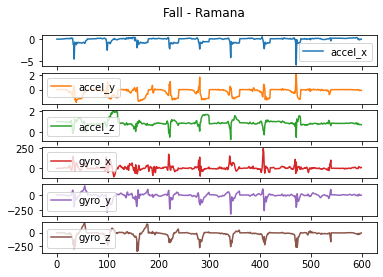

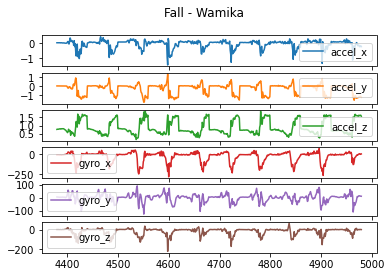

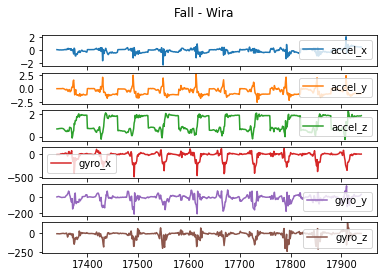

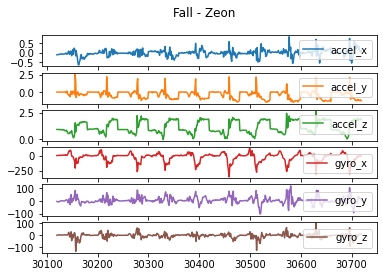

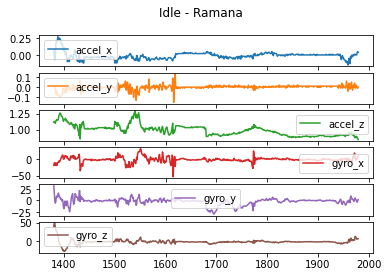

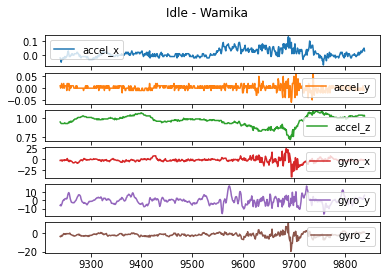

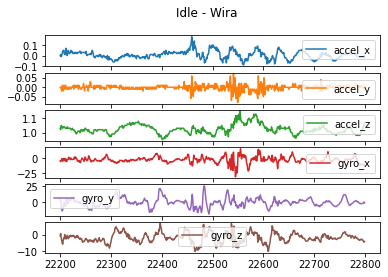

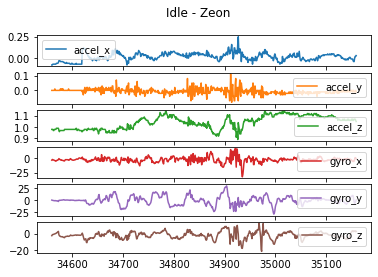

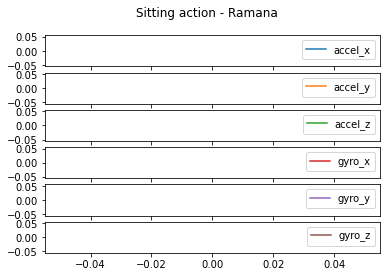

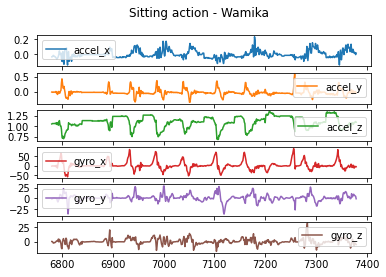

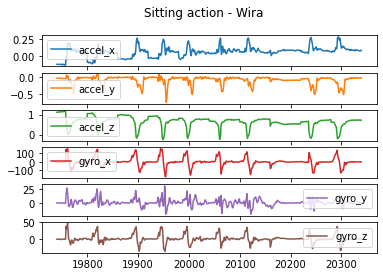

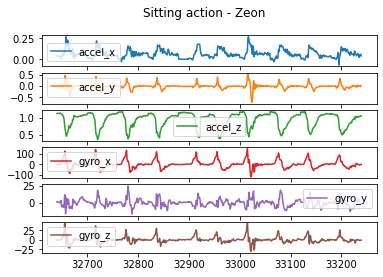

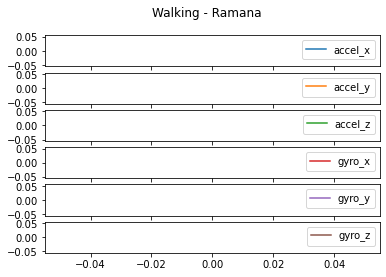

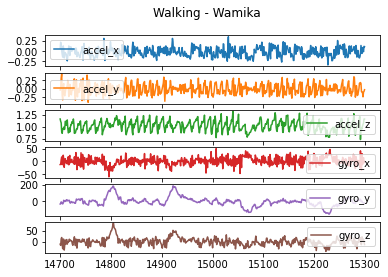

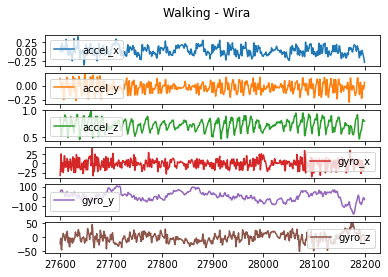

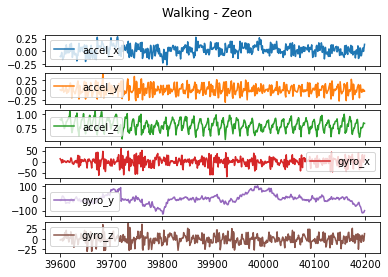

In [8]:
users = all_data.groupby(["user"]).groups.keys()
for action in actions:
    data = all_data[all_data["activity"]==action]
    for user in users:
        data_user = data[data["user"] == user][0:600]
        data_user = data_user.drop(["user", "activity"], axis = 1)
        title = action + " - " + user
        data_user.plot.line(subplots=True, title=title)

### Testing out filtering (not used)

In [39]:
filter_data = all_data[['accel_x', 'accel_y', 'accel_z', 'user', 'activity']]

# Filter creation and application
print("Filtering w/ 4th order Butterworth filter w/ fc = 5Hz...")
fs = 20            # Sampling frequency in Hz
order = 4           # Order signal
cutOff = 5          # cut-off frequency of the filter in Hz
nyquist = 0.5*fs    # Nyquist frequency
fc = cutOff/nyquist # Normalized cut-off frequency of the filter
t = 289800         # Elderly = 1.5h*15*3600, Youth = 3.5h*23*3600 so total time = 370,800

def filter(data, fc, order):
    # Get the filter coefficients
    sos = signal.butter(order, fc, output='sos')
    y = signal.sosfiltfilt(sos, data)
    return y

# Array -> Signal conversion
print("Converting array w/ data into sine wave...")
filter_data['accel_x'] = [i*np.sin(2*np.pi*fs*t) for i in filter_data['accel_x']]
filter_data['accel_y'] = [i*np.sin(2*np.pi*fs*t) for i in filter_data['accel_y']]
filter_data['accel_z'] = [i*np.sin(2*np.pi*fs*t) for i in filter_data['accel_z']]

# Filter application
print("Applying filter...")
AAcc_x = filter(filter_data['accel_x'], fc, order)
AAcc_y = filter(filter_data['accel_y'], fc, order)
AAcc_z = filter(filter_data['accel_z'], fc, order)

Filtering w/ 4th order Butterworth filter w/ fc = 5Hz...
Converting array w/ data into sine wave...
Applying filter...


In [40]:
filter_data['accel_x'] = AAcc_x
filter_data['accel_y'] = AAcc_y
filter_data['accel_z'] = AAcc_z

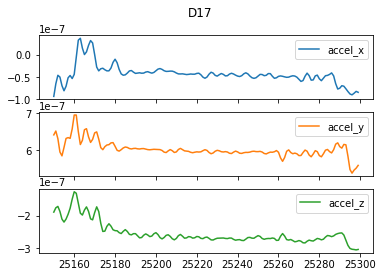

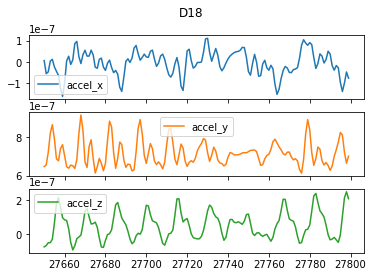

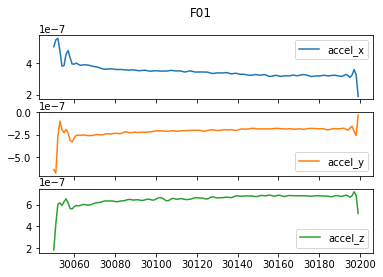

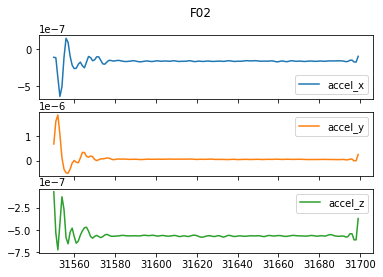

In [41]:
for action in ['D17', 'D18', 'F01', 'F02']:
    data = filter_data[filter_data["activity"]==action][150:300]
    data = data.drop(["user", "activity"], axis = 1)
    data.plot.line(subplots=True, title=action)